# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("AMZN.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,3144.000000,3250.850098,3130.000000,3149.840088,3149.840088,6094200
1,2020-09-09,3202.989990,3303.179932,3185.000000,3268.610107,3268.610107,5188700
2,2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700
3,2020-09-11,3208.689941,3217.340088,3083.979980,3116.219971,3116.219971,5094000
4,2020-09-14,3172.939941,3187.389893,3096.000000,3102.969971,3102.969971,4529600
...,...,...,...,...,...,...,...
246,2021-08-30,3357.429932,3445.000000,3355.219971,3421.570068,3421.570068,3192200
247,2021-08-31,3424.800049,3472.580078,3395.590088,3470.790039,3470.790039,4356400
248,2021-09-01,3496.399902,3527.000000,3475.239990,3479.000000,3479.000000,3629900
249,2021-09-02,3494.760010,3511.959961,3455.000000,3463.120117,3463.120117,2923700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,3266.643230,3299.274690,3228.649161,3262.862101,3262.862101,3.875329e+06
std,160.078204,159.192378,162.319815,162.181554,162.181554,1.405057e+06
min,2906.500000,2962.000000,2871.000000,2951.949951,2951.949951,1.451900e+06
25%,3155.054931,3188.380005,3121.395019,3149.285034,3149.285034,2.901150e+06
50%,3241.989990,3279.800049,3200.000000,3233.989990,3233.989990,3.495800e+06
75%,3348.824951,3373.935059,3311.185059,3343.909912,3343.909912,4.603950e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,9.957100e+06


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date"  , y="Close")

In [ ]:
px.line(df, x="Date"  , y="Volume")

In [ ]:
px.bar(df, y="Volume")

# Understanding Facebook Prophet

In [ ]:
px.box(df, y="Close")

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-08,3144.000000,3250.850098,3130.000000,3149.840088,3149.840088,6094200
1,2020-09-09,3202.989990,3303.179932,3185.000000,3268.610107,3268.610107,5188700
2,2020-09-10,3307.219971,3349.889893,3170.550049,3175.110107,3175.110107,5330700
3,2020-09-11,3208.689941,3217.340088,3083.979980,3116.219971,3116.219971,5094000
4,2020-09-14,3172.939941,3187.389893,3096.000000,3102.969971,3102.969971,4529600
...,...,...,...,...,...,...,...
246,2021-08-30,3357.429932,3445.000000,3355.219971,3421.570068,3421.570068,3192200
247,2021-08-31,3424.800049,3472.580078,3395.590088,3470.790039,3470.790039,4356400
248,2021-09-01,3496.399902,3527.000000,3475.239990,3479.000000,3479.000000,3629900
249,2021-09-02,3494.760010,3511.959961,3455.000000,3463.120117,3463.120117,2923700


In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2020-09-08,3149.840088
1,2020-09-09,3268.610107
2,2020-09-10,3175.110107
3,2020-09-11,3116.219971
4,2020-09-14,3102.969971
...,...,...
246,2021-08-30,3421.570068
247,2021-08-31,3470.790039
248,2021-09-01,3479.000000
249,2021-09-02,3463.120117


In [ ]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2020-09-08,3149.840088
1,2020-09-09,3268.610107
2,2020-09-10,3175.110107
3,2020-09-11,3116.219971
4,2020-09-14,3102.969971
...,...,...
246,2021-08-30,3421.570068
247,2021-08-31,3470.790039
248,2021-09-01,3479.000000
249,2021-09-02,3463.120117


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-08,3157.111861,3016.918710,3325.652458,3157.111861,3157.111861,8.821309,8.821309,8.821309,8.821309,8.821309,8.821309,0.0,0.0,0.0,3165.933170
1,2020-09-09,3157.340056,3012.758174,3325.626972,3157.340056,3157.340056,5.619154,5.619154,5.619154,5.619154,5.619154,5.619154,0.0,0.0,0.0,3162.959211
2,2020-09-10,3157.568252,3008.681246,3312.588382,3157.568252,3157.568252,3.670022,3.670022,3.670022,3.670022,3.670022,3.670022,0.0,0.0,0.0,3161.238274
3,2020-09-11,3157.796447,2997.050258,3297.734917,3157.796447,3157.796447,-5.794813,-5.794813,-5.794813,-5.794813,-5.794813,-5.794813,0.0,0.0,0.0,3152.001634
4,2020-09-14,3158.481033,2999.425473,3296.148130,3158.481033,3158.481033,-1.388742,-1.388742,-1.388742,-1.388742,-1.388742,-1.388742,0.0,0.0,0.0,3157.092291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-09-29,3431.707625,3281.572058,3578.527945,3425.655265,3437.008962,5.619154,5.619154,5.619154,5.619154,5.619154,5.619154,0.0,0.0,0.0,3437.326779
277,2021-09-30,3431.850229,3276.875729,3587.355222,3425.474344,3437.648537,3.670022,3.670022,3.670022,3.670022,3.670022,3.670022,0.0,0.0,0.0,3435.520251
278,2021-10-01,3431.992833,3272.370720,3572.053333,3425.246456,3438.051440,-5.794813,-5.794813,-5.794813,-5.794813,-5.794813,-5.794813,0.0,0.0,0.0,3426.198020
279,2021-10-02,3432.135438,3277.457399,3576.312875,3424.948762,3438.554847,-5.463465,-5.463465,-5.463465,-5.463465,-5.463465,-5.463465,0.0,0.0,0.0,3426.671972


In [ ]:
px.line(forecast, x='ds', y='yhat')

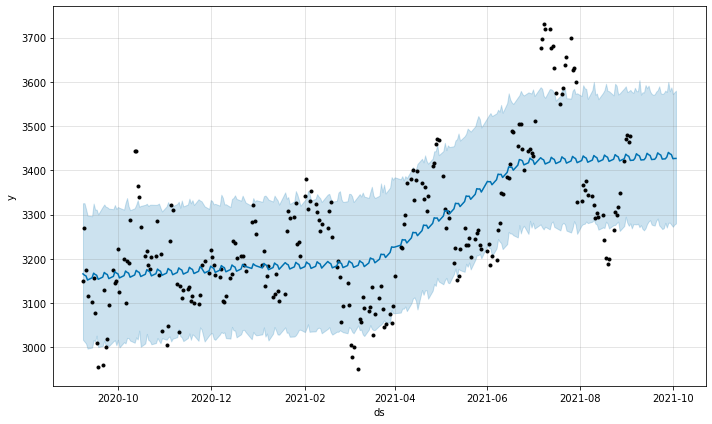

In [ ]:
figure = m.plot(forecast, xlabel = 'ds', ylabel = 'y')

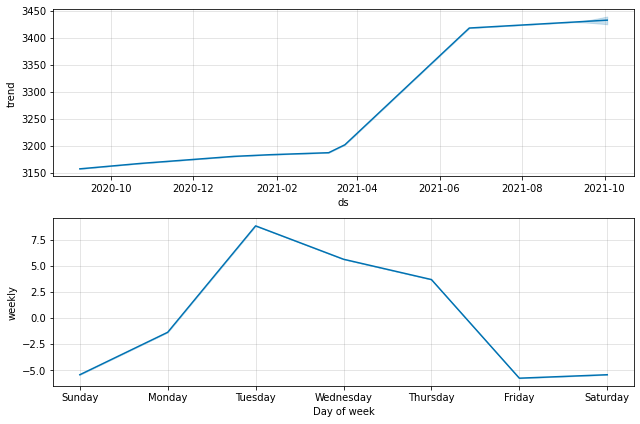

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>